In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path setup
drive_path = '/content/drive/My Drive/'
main_folder = 'data_sortir_split'
train_folder = os.path.join(drive_path, main_folder, 'train')
val_folder = os.path.join(drive_path, main_folder, 'val')
test_folder = os.path.join(drive_path, main_folder, 'test')

In [4]:
# Image generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
    train_folder, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = val_datagen.flow_from_directory(
    val_folder, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_folder, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 2192 images belonging to 52 classes.
Found 274 images belonging to 52 classes.
Found 276 images belonging to 52 classes.


In [5]:
# Build CNN model
num_classes = len(os.listdir(train_folder))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Early stopping
earlystop_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [7]:

# Train model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    callbacks=[earlystop_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 1938s 28s/step - accuracy: 0.0320 - loss: 4.1080 - val_accuracy: 0.0730 - val_loss: 3.7459
Epoch 2/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.0462 - loss: 3.7366 - val_accuracy: 0.0584 - val_loss: 3.6253
Epoch 3/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.0554 - loss: 3.5882 - val_accuracy: 0.1752 - val_loss: 3.2467
Epoch 4/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.0764 - loss: 3.4519 - val_accuracy: 0.1971 - val_loss: 3.0846
Epoch 5/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.1064 - loss: 3.2945 - val_accuracy: 0.2445 - val_loss: 2.6448
Epoch 6/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.1388 - loss: 3.0907 - val_accuracy: 0.2701 - val_loss: 2.5012
Epoch 7/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.1630 - loss: 2.9272 - val_accuracy: 0.2993 - val_loss: 2.3291
Epoch 8/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.1711 - loss: 2.8450 - val_accuracy: 0.295

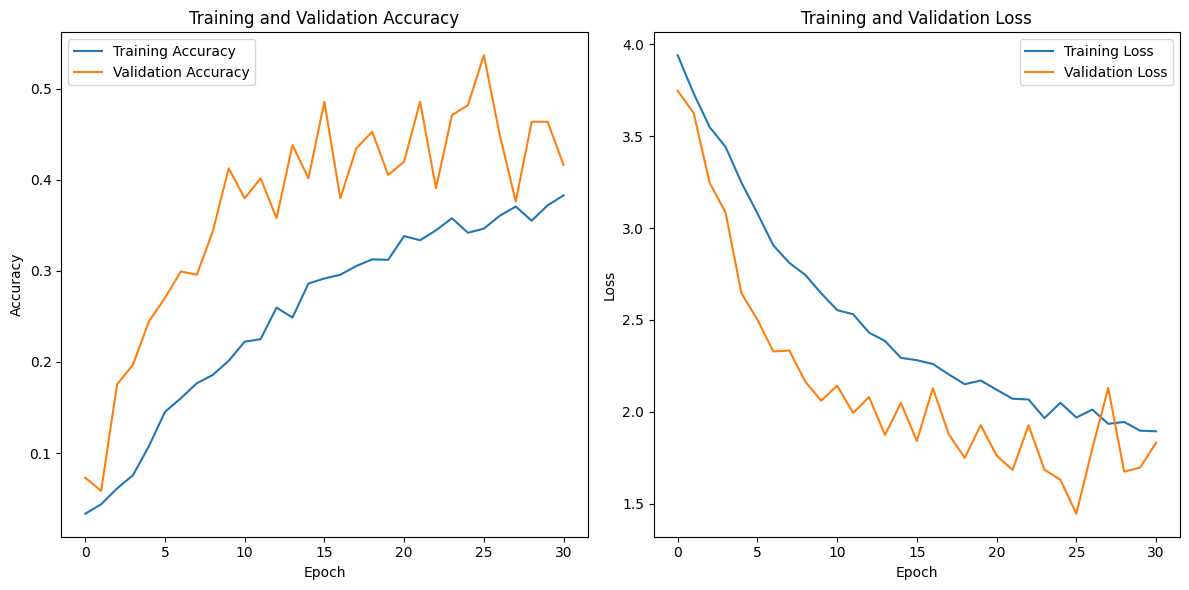

In [8]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 178s 22s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Akurasi: 0.5145
Recall: 0.5256
Presisi: 0.4871
Skor F1: 0.4751

Laporan Klasifikasi:

                                               precision    recall  f1-score   support

                                  Anthracnose       0.00      0.00      0.00         5
                                     Bacteria       0.67      0.80      0.73         5
                          Bacterial Leaf Spot       0.43      0.60      0.50         5
                               Bacterial Wilt       0.60      0.60      0.60         5
                              BacterialBlight       1.00      0.80      0.89         5
                                    Belly Rot       0.40      0.40      0.40         5
                                  Bercak_Daun       0.56      0.83      0.67         6
                                    Black Rot       0.67      0.40      0.50         5
                                        Blast       0.83      1.00      0.91         5
                                    BrownSp

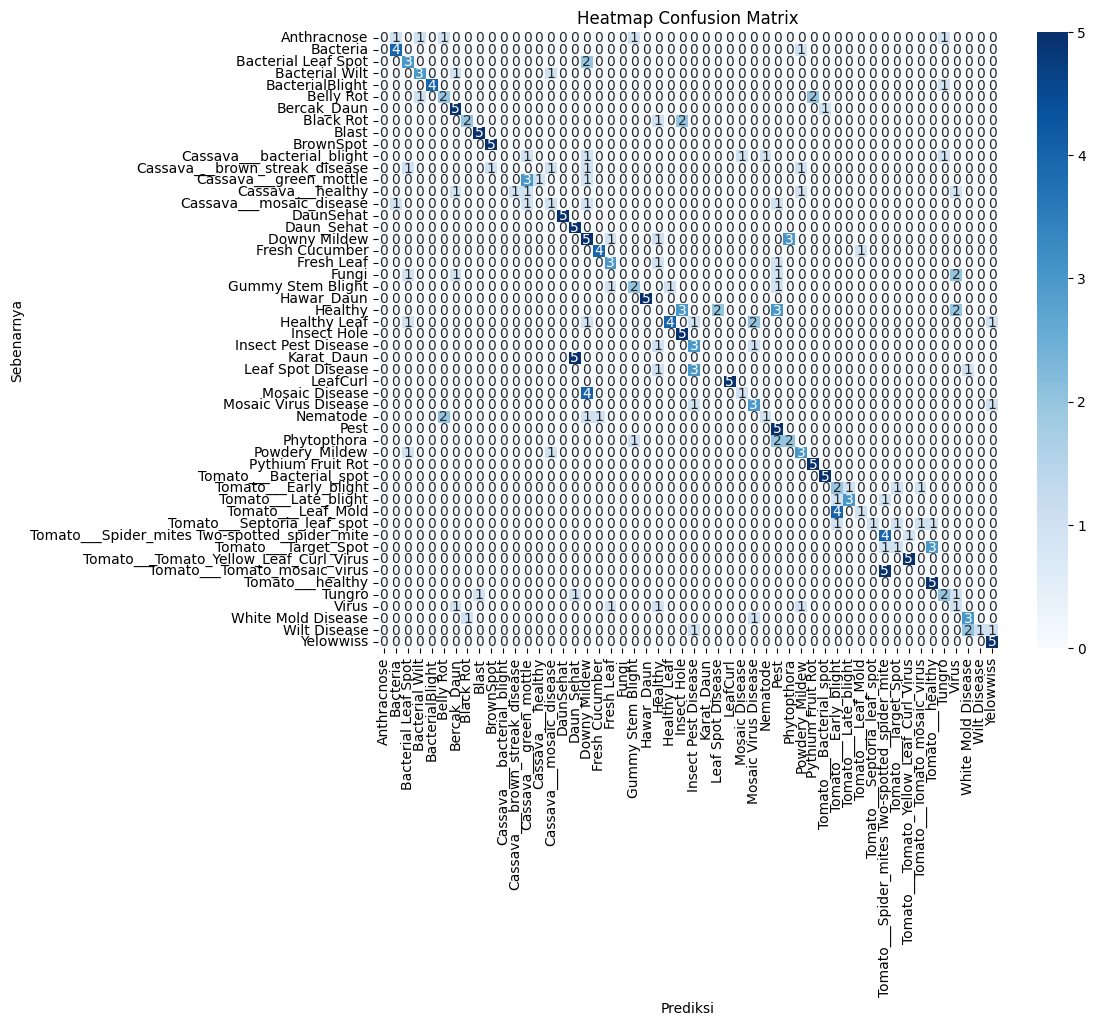

In [9]:
# Evaluate model
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, predicted_classes)
accuracy = accuracy_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes, average='macro')
precision = precision_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'Akurasi: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Skor F1: {f1:.4f}')

print('\nLaporan Klasifikasi:\n')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [10]:
# Save model
model_save_path = '/content/drive/My Drive/CNN/final_cnn.h5'
model.save(model_save_path)
print(f"Model disimpan ke: {model_save_path}")

Model disimpan ke: /content/drive/My Drive/CNN/final_cnn.h5


In [11]:
# Save label map
label_map = train_generator.class_indices
with open('/content/drive/My Drive/CNN/label_map.pkl', 'wb') as f:
    pickle.dump(label_map, f)
print("✅ label_map berhasil disimpan.")

✅ label_map berhasil disimpan.
